### Kaggle Allstate Claims Severity randomForest model
https://www.kaggle.com/c/allstate-claims-severity
#### Goal
 To predict car insurance claim $$ from paperworks (categorical and numerical values).
#### Approach
 Regression model. tried 1.ridge 2. random forest.
 Response variable, y, is not normally distributed. I did log10 transform to get it close to normal. It improved my results when i use ridge.

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')

In [3]:
X_train = train.drop(['id','loss'], axis=1)
y_train = train['loss']
X_test = test.copy().drop('id', axis=1)
print 'X_train shape:', X_train.shape
print 'y_train shape:', y_train.shape
print 'X_test shape:' , X_test.shape

X_train shape: (188318, 130)
y_train shape: (188318,)
X_test shape: (125546, 130)


In [4]:
def cat_encode(dat):
    """return dat with categoricals changed to indices"""
    enc = LabelEncoder()
    for c in dat.columns:
        if 'cat' in c:
            dat[c] = enc.fit_transform(dat[c])
    return dat

In [5]:
rf = RandomForestRegressor()
rf.fit(cat_encode(X_train), y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [6]:
print 'Train MAE = %f' %mean_absolute_error(y_train, rf.predict(X_train))

Train MAE = 518.557561


In [7]:
y_test = rf.predict(cat_encode(X_test))

(0, 20000)

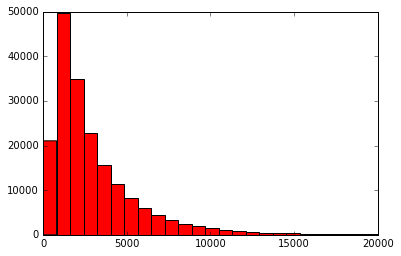

In [8]:
plt.hist(y_train, color='red', bins=150)
plt.xlim(0, 20000)

(0, 20000)

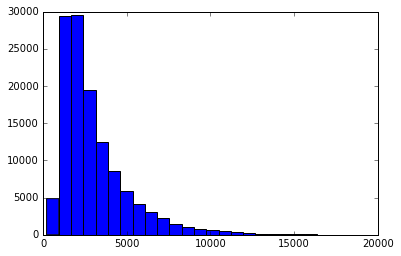

In [9]:
plt.hist(y_test, color='blue', bins=100)
plt.xlim(0, 20000)

In [13]:
sub = pd.concat([test['id'], pd.DataFrame(y_test)], axis=1)

In [15]:
sub.to_csv('sample_submission.csv', index=False)